# Co2 emission project

In [ ]:
# in this project we analyse the emission of co2 and it's relation with different features of car using a linear regression model

In [1]:
# Task-1
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,metrics

In [2]:
# storing the data from C02.csv
emission =pd.read_csv('downloads/CO2 emission.csv')

In [3]:
# Task-2
# a)Analyzing the shape of Data using shape
emission.shape

(1067, 14)

In [4]:
# b)displaying the top 5 rows using .head() function
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB.1,TORQUE,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,8.5,400.0,196
1,2014,ACURA,ILX,COMPACT,2.4,2,M6,Z,11.2,7.7,9.6,9.6,890.0,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,5.9,860.0,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,4.0,6,AS6,Z,12.7,9.1,11.1,11.1,1000.0,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,4,AS6,Z,12.1,8.7,10.6,10.6,1357.0,244


In [5]:
# c)picking out four columns which contribute towards CO2 emission
emission_new=emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','TORQUE','CO2EMISSIONS']]

In [6]:
emission_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
0,2.0,4,8.5,400.0,196
1,2.4,2,9.6,890.0,221
2,1.5,4,5.9,860.0,136
3,4.0,6,11.1,1000.0,255
4,3.5,4,10.6,1357.0,244


In [7]:
# Task-3
# a)checking the basic statistics of using .describe() function
emission_new.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.349110,5.779756,11.580881,1419.236645,256.228679
std,1.419466,1.797758,3.485595,351.701581,63.372304
min,1.000000,2.000000,4.700000,400.000000,108.000000
25%,2.000000,4.000000,9.000000,1153.500000,207.000000
50%,3.400000,6.000000,10.900000,1395.500000,251.000000
75%,4.300000,8.000000,13.350000,1632.000000,294.000000
max,8.400000,12.000000,25.800000,2699.000000,488.000000


<Figure size 1152x864 with 0 Axes>

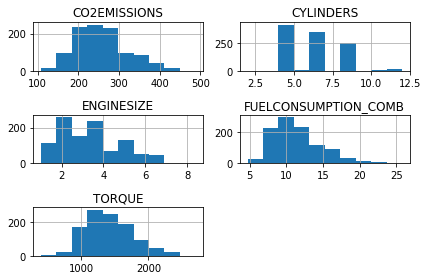

In [9]:
# Task-4
# a) creating the Box-plot using hist() function
fig=plt.figure(figsize=(16,12))
emission_new.hist()
plt.tight_layout()
plt.show()

In [10]:
# b)finding out the dependent variable using corr() function
corr=emission_new.corr()

In [11]:
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
ENGINESIZE,1.000000,0.917457,0.816502,0.863699,0.871102
CYLINDERS,0.917457,1.000000,0.764901,0.833958,0.832688
FUELCONSUMPTION_COMB,0.816502,0.764901,1.000000,0.879636,0.892129
TORQUE,0.863699,0.833958,0.879636,1.000000,0.988196
CO2EMISSIONS,0.871102,0.832688,0.892129,0.988196,1.000000


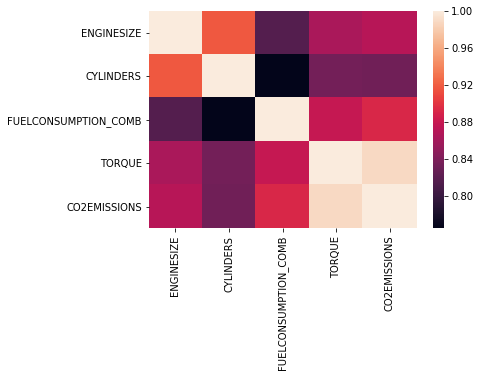

In [12]:
# c)plotting the heatmap for correlation between columns
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

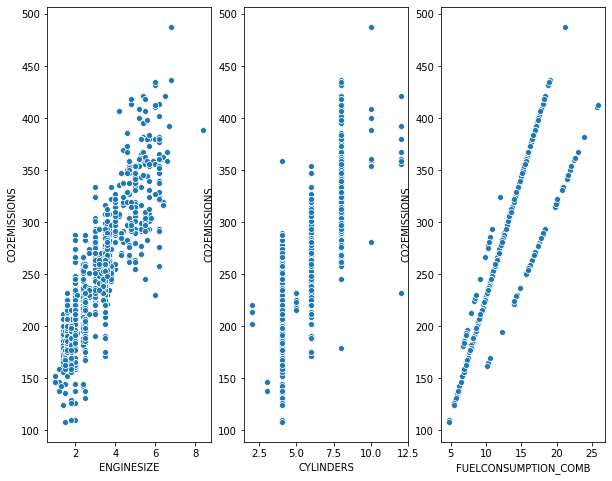

In [13]:
# d)creating a figure and plotting 3 scatterplots of selected columns
fig2=plt.figure(figsize=(10,8))
a1=fig2.add_subplot(131)
a2=fig2.add_subplot(132)
a3=fig2.add_subplot(133)
sns.scatterplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission_new,ax=a1)
sns.scatterplot(x='CYLINDERS',y='CO2EMISSIONS',data=emission_new,ax=a2)
sns.scatterplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission_new,ax=a3)
plt.show()

In [14]:
#from the above figure we conclude that CO2emissions is a dependent variable
#and engine size and fuelconsumption_comb are independent variables

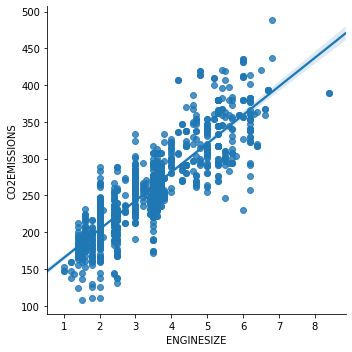

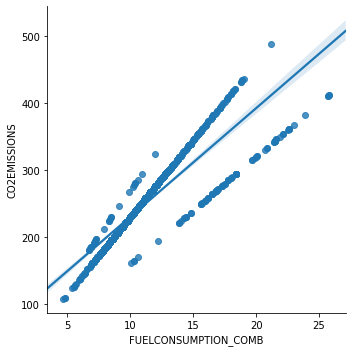

In [15]:
# e)plotting  lmplot between the dependent and independent variables
sns.lmplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission_new)
sns.lmplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission_new)
plt.show()

In [16]:
# Task-5
#creating  a prediction model using simple linear regression
from sklearn.model_selection import train_test_split

In [85]:
x=emission_new[['ENGINESIZE']]
y=emission_new['CO2EMISSIONS']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=20)

In [86]:
# a)fitting a simple linear regression model
simple_model=linear_model.LinearRegression()

In [87]:
simple_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# b) finding the score or r-squared  value
simple_model.score(train_x,train_y)

0.7618310861288433

In [89]:
# b)finding out the slope and intercept
print('the slope of given model is:',simple_model.coef_[0])

the slope of given model is: 38.78003733349359


In [90]:
#intercept or c
print('the intercept of given model is:',simple_model.intercept_)

the intercept of given model is: 126.28317678039556


In [91]:
# c) engine size=3.5
# the mathematical equation used here is y=m*x+c
# here m is the coefficient and c is the intercept
co2em=simple_model.coef_[0]*3.5+simple_model.intercept_
print('co2 emission when engine size is 3.5 is:',co2em)

co2 emission when engine size is 3.5 is: 262.0133074476231


In [92]:
# d) now predicting using predict() method
predict_y=simple_model.predict(test_x)

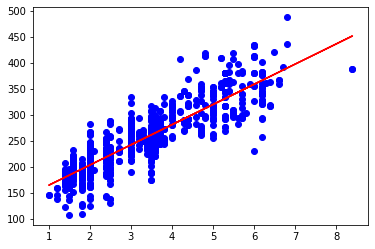

In [93]:
plt.scatter(train_x,train_y,color='blue')
plt.plot(train_x, simple_model.coef_[0]*train_x + simple_model.intercept_, '-r')
plt.show()
# now from the plotted graph we can see the co2 emission found
# if engine size is 3.5 is nearly 250

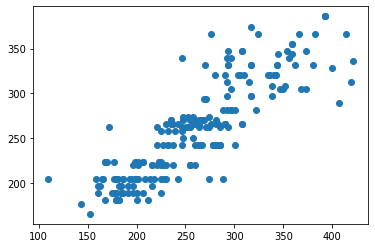

In [94]:
plt.scatter(test_y,predict_y)
plt.show()

In [123]:
# Task-6
# creating a multivariate prediction model
# a) fitting a linear regreesion model for multiple variables
multi_model = linear_model.LinearRegression()

In [149]:
X=emission_new[['ENGINESIZE','FUELCONSUMPTION_COMB']]
Y=emission_new['CO2EMISSIONS']
Train_x, Test_x,Train_y,Test_y=train_test_split(X,Y,test_size=0.2, random_state=20)

In [150]:
multi_model.fit(Train_x,Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# b) finding the score or r-squared  value 
multi_model.score(Train_x,Train_y)

0.8566343102319098

In [152]:
# b) finding values of slope and intercept
print('slope of this model  is:',multi_model.coef_)
print('intercept of this model  is:',multi_model.intercept_)

slope of this model  is: [19.20957283  9.73389428]
intercept of this model  is: 79.05048496411194


In [153]:
# c) 
#i)
engine_size1=3
fuel_consumption1=10
#ii)
engine_size2=3.5 
fuel_consumption2=7.87
val1=multi_model.coef_[0]*engine_size1+multi_model.coef_[1]*fuel_consumption1+multi_model.intercept_
val2=multi_model.coef_[0]*engine_size2+multi_model.coef_[1]*fuel_consumption2+multi_model.intercept_
print('the predicted co2 emission for i is:',val1)
print('the predicted co2 emission for ii is:',val2)

the predicted co2 emission for i is: 234.01814625441796
the predicted co2 emission for ii is: 222.8897378500165


In [154]:
# d) predicting co2emission using predict() method
predict_Y = multi_model.predict(Test_x)

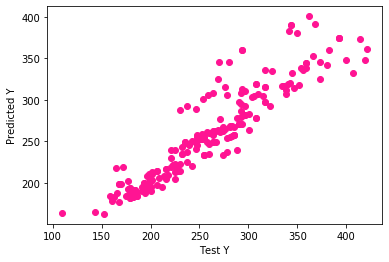

In [155]:
plt.scatter(Test_y,predict_Y , color = '#FF1493')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()


In [157]:
# Task-7
# a) finding out the predicted values of y in both models
simple_y=simple_model.predict(test_x)
multi_y=multi_model.predict(Test_x)

In [161]:
# b) finding out the  mean squared value of both models
simple_mse= metrics.mean_squared_error(test_y,predict_y)
multi_mse = metrics.mean_squared_error(Test_y,predict_Y)

In [166]:
print('the mean squared value of simple regression model is:',simple_mse)
print('the mean squared value of multi-variate model is:',multi_mse)

the mean squared value of simple regression model is: 1029.8303772818995
the mean squared value of multi-variate model is: 577.6128651018387


In [169]:
# c) Analysing  the  result
# from the above calculated data of the obtained mean square values
# we can clearly see that the  multi-variate model is better
# as the mean square value of multi-variate model is lesser
# than that of simple regression model
print('multi-variate model is better for analysing the given data')

multi-variate model is better for analysing the given data
